In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

In [318]:
df = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\ST CLAIR COLLEGE\First Semester\ANALYTI TOOLS & DECISN MAKING\Project 1\dataset_4.csv")

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18824 entries, 0 to 18823
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Period                 18824 non-null  object 
 1   Activity               18824 non-null  object 
 2   Source                 18824 non-null  object 
 3   Destination            18821 non-null  object 
 4   Energy (MW.h)          18824 non-null  float64
 5   Total Value (CAN$)     18824 non-null  float64
 6   Price (CAN$/MW.h)      18824 non-null  float64
 7   Prime Minister         18824 non-null  object 
 8   Political Party        18824 non-null  object 
 9   Year                   18824 non-null  int64  
 10  Province Pop           18824 non-null  object 
 11  Province Power Plants  18824 non-null  int64  
 12  Province GDP           18824 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.9+ MB


In [320]:
# Calculating the price of energy for "Confidential" values
df_confidential = df[df['Price (CAN$/MW.h)'] == 'Confidential']
df = df[df['Price (CAN$/MW.h)'] != 'Confidential']
df_confidential['Price (CAN$/MW.h)'] = df_confidential['Total Value (CAN$)']/df_confidential['Energy (MW.h)']
df = pd.concat([df, df_confidential], axis=0)
df['Price (CAN$/MW.h)'] = df['Price (CAN$/MW.h)'].astype(float)

# Transforming the Province Population into "int" type
df['Province Pop'] = df['Province Pop'].str.replace(',', '').astype('int64')

# Adjusting the values of GDP that were in thousands
df['Province GDP'] = df['Province GDP']*1000

# Creating the column of 'GDP per Capita'
df['GDP per Capita'] = df['Province GDP']/df['Province Pop']

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18824 entries, 0 to 18823
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Period                 18824 non-null  object 
 1   Activity               18824 non-null  object 
 2   Source                 18824 non-null  object 
 3   Destination            18821 non-null  object 
 4   Energy (MW.h)          18824 non-null  float64
 5   Total Value (CAN$)     18824 non-null  float64
 6   Price (CAN$/MW.h)      18824 non-null  float64
 7   Prime Minister         18824 non-null  object 
 8   Political Party        18824 non-null  object 
 9   Year                   18824 non-null  int64  
 10  Province Pop           18824 non-null  int64  
 11  Province Power Plants  18824 non-null  int64  
 12  Province GDP           18824 non-null  float64
 13  GDP per Capita         18824 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 2.2+ 

In [322]:
df.head(3)

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h),Prime Minister,Political Party,Year,Province Pop,Province Power Plants,Province GDP,GDP per Capita
0,1990-01-01,Exports,British Columbia,Alaska,75.20,4536.00,60.32,Brian Mulroney (b. 1939),Progressive Conservative (Ldr. 1983),1990,3322896,9,87559000.00,26.35
1,1990-01-01,Exports,British Columbia,California,345904.00,11144596.03,32.22,Brian Mulroney (b. 1939),Progressive Conservative (Ldr. 1983),1990,3322896,9,87559000.00,26.35
2,1990-01-01,Exports,British Columbia,Oregon,148800.00,4770498.00,32.06,Brian Mulroney (b. 1939),Progressive Conservative (Ldr. 1983),1990,3322896,9,87559000.00,26.35


In [323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy (MW.h),18824.00,104763.68,221587.23,-27885.00,597.75,7251.40,79286.25,2022303.00
Total Value (CAN$),18824.00,5083986.35,13433978.37,-12452609.22,22096.54,319421.78,3468141.30,455483705.40
Price (CAN$/MW.h),18824.00,49.64,104.41,-2680.20,24.87,38.89,60.73,10832.80
Year,18824.00,2008.23,8.86,1990.00,2001.00,2009.00,2016.00,2022.00
Province Pop,18824.00,6196220.19,4408401.47,520203.00,3453944.00,4590545.00,8591596.50,15262660.00
Province Power Plants,18824.00,12.88,7.99,3.00,8.00,10.00,17.00,39.00
Province GDP,18824.00,282552249.47,211391449.36,9300000.00,141853000.00,230764000.00,341688000.00,752393000.00
GDP per Capita,18824.00,45.59,13.05,12.44,38.83,45.00,49.24,82.38


In [324]:
# Adjusting the names of the columns
df.columns = ['Period', 'Activity', 'Source', 'Destination', 'Energy (MW.h)',
       'Total Value (CAN$)', 'Price (CAN$/MW.h)', 'Prime Minister',
       'Political Party', 'Year', 'Province Pop', 'Province Power Plants', 'Province GDP', 'GDP per Capita']

In [325]:
# Creating a function to remove the parentheses from the name of the political parties
def clean_column(df, column):
    df[column] = df[column].apply(lambda x: re.sub(r'\([^)]*\)', '', x).strip())
    return df
df = clean_column(df, 'Political Party')

In [326]:
# Checking for NaN values in the dataframe
df.isna().sum()

Period                   0
Activity                 0
Source                   0
Destination              3
Energy (MW.h)            0
Total Value (CAN$)       0
Price (CAN$/MW.h)        0
Prime Minister           0
Political Party          0
Year                     0
Province Pop             0
Province Power Plants    0
Province GDP             0
GDP per Capita           0
dtype: int64

In [327]:
# Displaying the rows that contains NaN
df[df['Destination'].isna()]

# Opted not to remove these rows since the analysis is centered on provinces rather than US states.

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h),Prime Minister,Political Party,Year,Province Pop,Province Power Plants,Province GDP,GDP per Capita
1587,1997-07-01,Exports,British Columbia,NaN,17280.00,554991.26,32.12,Jean Chrétien (b. 1934),Liberal,1997,3964677,9,141853000.00,35.78
1620,1997-08-01,Exports,British Columbia,NaN,20800.00,671478.60,32.28,Jean Chrétien (b. 1934),Liberal,1997,3964677,9,141853000.00,35.78
1655,1997-09-01,Exports,British Columbia,NaN,15350.00,501942.40,32.70,Jean Chrétien (b. 1934),Liberal,1997,3964677,9,141853000.00,35.78


In [328]:
# Checking duplicated rows
df[df.duplicated]

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h),Prime Minister,Political Party,Year,Province Pop,Province Power Plants,Province GDP,GDP per Capita


In [329]:
# Checking the number of negative value in these columns
print(f"Number of negative values in the column 'Energy (MW.h)': {len(df[df['Energy (MW.h)'] < 0])}")
print(f"Number of negative values in the column 'Total Value (CAN$)': {len(df[df['Total Value (CAN$)'] < 0])}")
print(f"Number of negative values in the column 'Price (CAN$/MW.h)': {len(df[df['Price (CAN$/MW.h)'] < 0])}")
print(f'Before: {df.shape}')

# Removing these rows:
df = df[(df['Energy (MW.h)'] >= 0) & (df['Total Value (CAN$)'] >= 0) & (df['Price (CAN$/MW.h)'] >= 0)]
print(f'After: {df.shape}')

Number of negative values in the column 'Energy (MW.h)': 3
Number of negative values in the column 'Total Value (CAN$)': 165
Number of negative values in the column 'Price (CAN$/MW.h)': 162
Before: (18824, 14)
After: (18657, 14)


In [330]:
# Checking the number of negative value in these columns
print(f"Number of zeros in the column 'Energy (MW.h)': {len(df[df['Energy (MW.h)'] == 0])}")
print(f"Number of zeros in the column 'Total Value (CAN$)': {len(df[df['Total Value (CAN$)'] == 0])}")
print(f"Number of zeros in the column 'Price (CAN$/MW.h)': {len(df[df['Price (CAN$/MW.h)'] == 0])}")

# Opted not to remove these rows since there can be energy sent for free to the US

Number of zeros in the column 'Energy (MW.h)': 743
Number of zeros in the column 'Total Value (CAN$)': 842
Number of zeros in the column 'Price (CAN$/MW.h)': 931


In [331]:
# Separating the main dataframe into "Imports" and "Exports"
df_imp = df[df['Activity'] == 'Imports'].reset_index(drop=True)
df_exp = df[df['Activity'] == 'Exports'].reset_index(drop=True)

In [332]:
# Creating the list of provinces
list_provinces = list(df_imp['Destination'].unique())

In [333]:
# Creating two groupby dataframes with Importations and Exportations per Year
imp_groupby = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
exp_groupby = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)

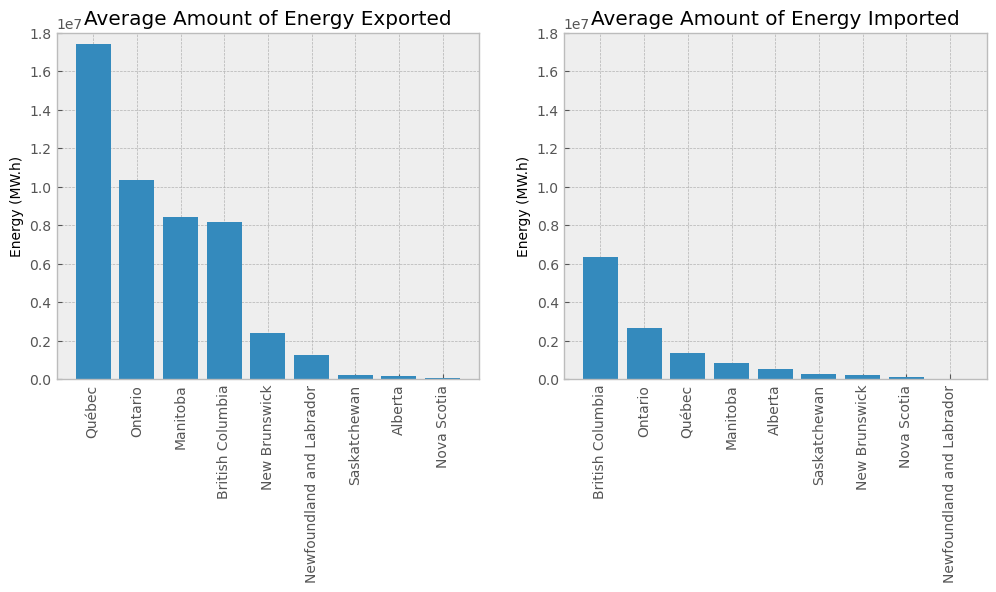

In [334]:
# Creating plots to show the amount of energy imported/exported from/to the US per province

# Using MEAN !!
exp_mean = []
imp_mean = []
for province in list_provinces:
    exp_mean.append(exp_groupby.loc[province, 'Energy (MW.h)'].mean())
    imp_mean.append(imp_groupby.loc[province, 'Energy (MW.h)'].mean())
final_df = pd.DataFrame({
    'Province':list_provinces,
    'Exportations':exp_mean,
    'Importations':imp_mean
})
final_df = final_df.sort_values('Exportations', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(12, 4.5))

ax[0].bar(final_df['Province'], final_df['Exportations'])
ax[0].set_xticks(range(len(final_df)))
ax[0].set_xticklabels(final_df['Province'], rotation=90)
ax[0].set_ylabel('Energy (MW.h)')
ax[0].set_title('Average Amount of Energy Exported')
ax[0].set_ylim([0, 18000000])

final_df = final_df.sort_values('Importations', ascending=False)

ax[1].bar(final_df['Province'], final_df['Importations'])
ax[1].set_xticks(range(len(final_df)))
ax[1].set_xticklabels(final_df['Province'], rotation=90)
ax[1].set_ylabel('Energy (MW.h)')
ax[1].set_title('Average Amount of Energy Imported')
ax[1].set_ylim([0, 18000000])

plt.show()

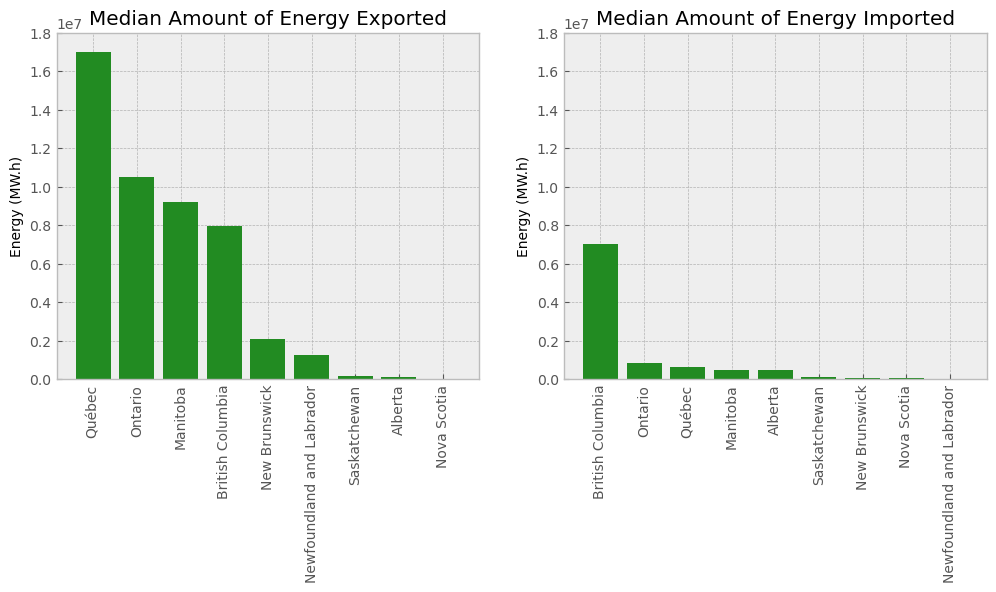

In [335]:
# Creating plots to show the amount of energy imported/exported from/to the US per province

# Using MEDIAN !!
exp_mean = []
imp_mean = []
for province in list_provinces:
    exp_mean.append(exp_groupby.loc[province, 'Energy (MW.h)'].median())
    imp_mean.append(imp_groupby.loc[province, 'Energy (MW.h)'].median())
final_df = pd.DataFrame({
    'Province':list_provinces,
    'Exportations':exp_mean,
    'Importations':imp_mean
})
final_df = final_df.sort_values('Exportations', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(12, 4.5))

ax[0].bar(final_df['Province'], final_df['Exportations'], color='forestgreen')
ax[0].set_xticks(range(len(final_df)))
ax[0].set_xticklabels(final_df['Province'], rotation=90)
ax[0].set_ylabel('Energy (MW.h)')
ax[0].set_title('Median Amount of Energy Exported')
ax[0].set_ylim([0, 18000000])

final_df = final_df.sort_values('Importations', ascending=False)

ax[1].bar(final_df['Province'], final_df['Importations'], color='forestgreen')
ax[1].set_xticks(range(len(final_df)))
ax[1].set_xticklabels(final_df['Province'], rotation=90)
ax[1].set_ylabel('Energy (MW.h)')
ax[1].set_title('Median Amount of Energy Imported')
ax[1].set_ylim([0, 18000000])

plt.show()

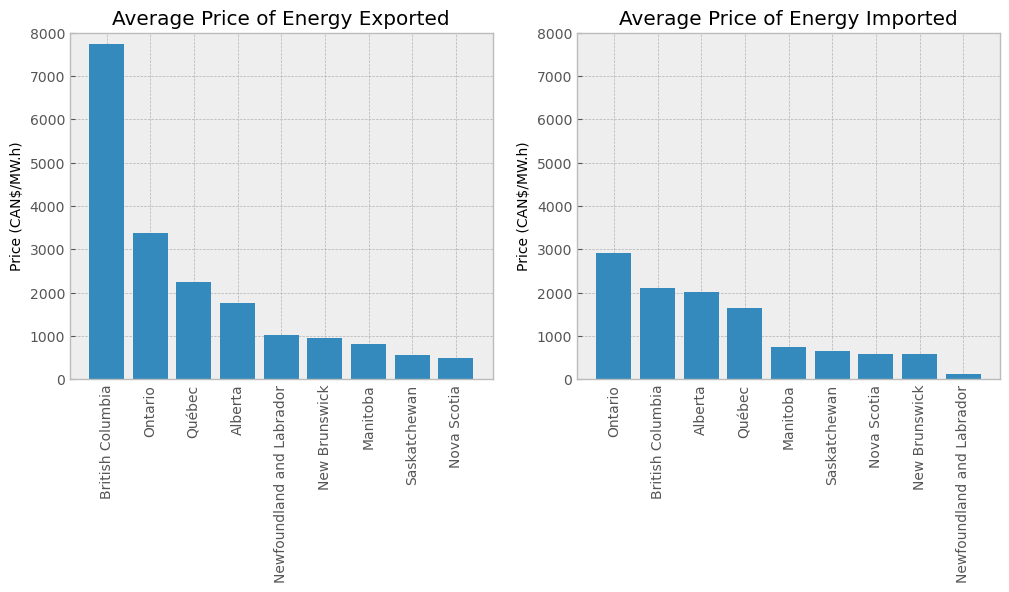

In [336]:
# Creating plots to show the price paid for energy imported/exported from/to the US per province

# Using MEAN !!
price_exp_mean = []
price_imp_mean = []
for province in list_provinces:
    price_exp_mean.append(exp_groupby.loc[province, 'Price (CAN$/MW.h)'].mean())
    price_imp_mean.append(imp_groupby.loc[province, 'Price (CAN$/MW.h)'].mean())
final_df = pd.DataFrame({
    'Province':list_provinces,
    'Price of Exportations':price_exp_mean,
    'Price of Importations':price_imp_mean
})
final_df = final_df.sort_values('Price of Exportations', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(12, 4.5))

ax[0].bar(final_df['Province'], final_df['Price of Exportations'])
ax[0].set_xticks(range(len(final_df)))
ax[0].set_xticklabels(final_df['Province'], rotation=90)
ax[0].set_ylabel('Price (CAN$/MW.h)')
ax[0].set_title('Average Price of Energy Exported')
ax[0].set_ylim([0, 8000])

final_df = final_df.sort_values('Price of Importations', ascending=False)

ax[1].bar(final_df['Province'], final_df['Price of Importations'])
ax[1].set_xticks(range(len(final_df)))
ax[1].set_xticklabels(final_df['Province'], rotation=90)
ax[1].set_ylabel('Price (CAN$/MW.h)')
ax[1].set_title('Average Price of Energy Imported')
ax[1].set_ylim([0, 8000])

plt.show()

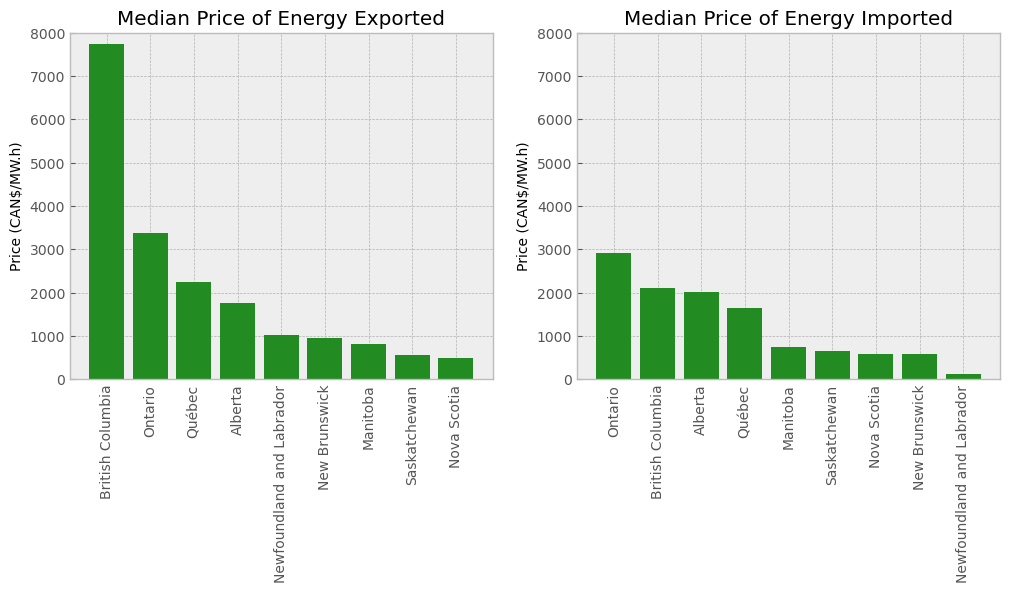

In [337]:
# Creating plots to show the price paid for energy imported/exported from/to the US per province

# Using MEDIAN !!
price_exp_mean = []
price_imp_mean = []
for province in list_provinces:
    price_exp_mean.append(exp_groupby.loc[province, 'Price (CAN$/MW.h)'].mean())
    price_imp_mean.append(imp_groupby.loc[province, 'Price (CAN$/MW.h)'].mean())
final_df = pd.DataFrame({
    'Province':list_provinces,
    'Price of Exportations':price_exp_mean,
    'Price of Importations':price_imp_mean
})
final_df = final_df.sort_values('Price of Exportations', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(12, 4.5))

ax[0].bar(final_df['Province'], final_df['Price of Exportations'], color='forestgreen')
ax[0].set_xticks(range(len(final_df)))
ax[0].set_xticklabels(final_df['Province'], rotation=90)
ax[0].set_ylabel('Price (CAN$/MW.h)')
ax[0].set_title('Median Price of Energy Exported')
ax[0].set_ylim([0, 8000])

final_df = final_df.sort_values('Price of Importations', ascending=False)

ax[1].bar(final_df['Province'], final_df['Price of Importations'], color='forestgreen')
ax[1].set_xticks(range(len(final_df)))
ax[1].set_xticklabels(final_df['Province'], rotation=90)
ax[1].set_ylabel('Price (CAN$/MW.h)')
ax[1].set_title('Median Price of Energy Imported')
ax[1].set_ylim([0, 8000])

plt.show()

### CREATING A DATAFRAME FOR PROFITS

In [338]:
# Creatinga a list with the name of the Provinces
list_provinces = list(df_imp['Destination'].unique())
# Creating an empty dataframe to insert the profits per province and year
profit_df = pd.DataFrame()
# Runing through the all the provinces
for province in list_provinces:
    # Calculating the profit per province
    cur_df = exp_groupby.loc[province] - imp_groupby.loc[province]
    # Adding the profit of the current Province to the Dataframe
    profit_df = profit_df.merge(cur_df[['Total Value (CAN$)']].rename(columns={'Total Value (CAN$)': f'{province}'}), how='outer', right_index=True, left_index=True)
# Grouping the least profitable Provinces into 'Others' category
list_big_profits = list(profit_df.sum().sort_values(ascending=False).head(5).index)
list_big_profits.append('Others')
# Creating the column 'Others' in the profit dataframe
profit_df['Others'] = profit_df.iloc[:, 5:].sum(axis=1)

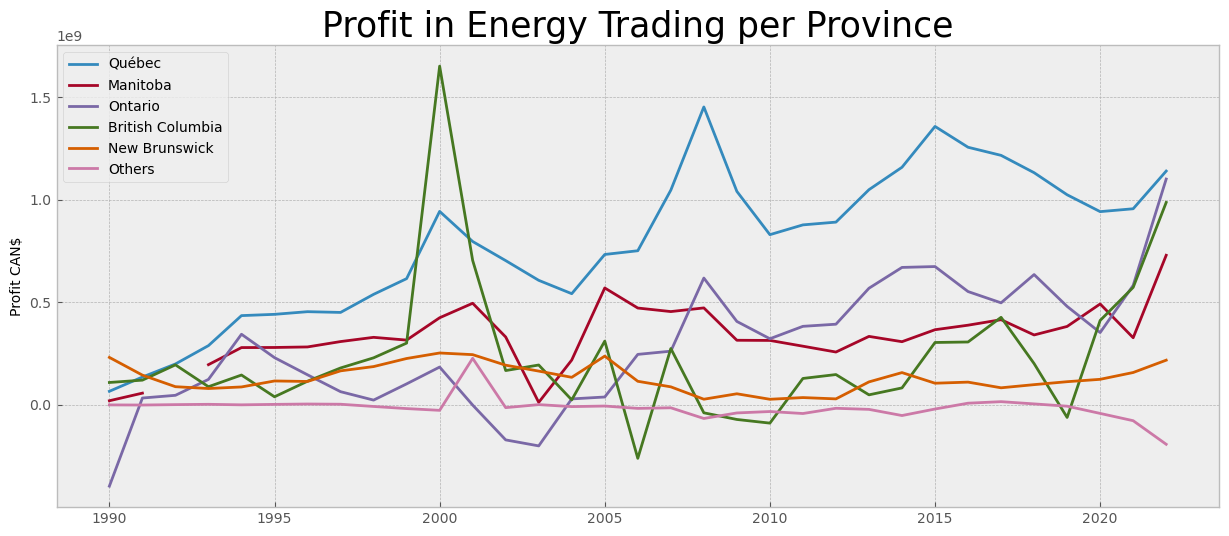

In [341]:
# Plotting a line graph of profits with energy trading considering the trades with US

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(15, 6))
for province in list_big_profits:
    ax.plot(profit_df[f'{province}'])    
    ax.legend(labels=list_big_profits)    
ax.set_ylabel('Profit CAN$')
ax.set_title('Profit in Energy Trading per Province', fontsize=25)
plt.show()

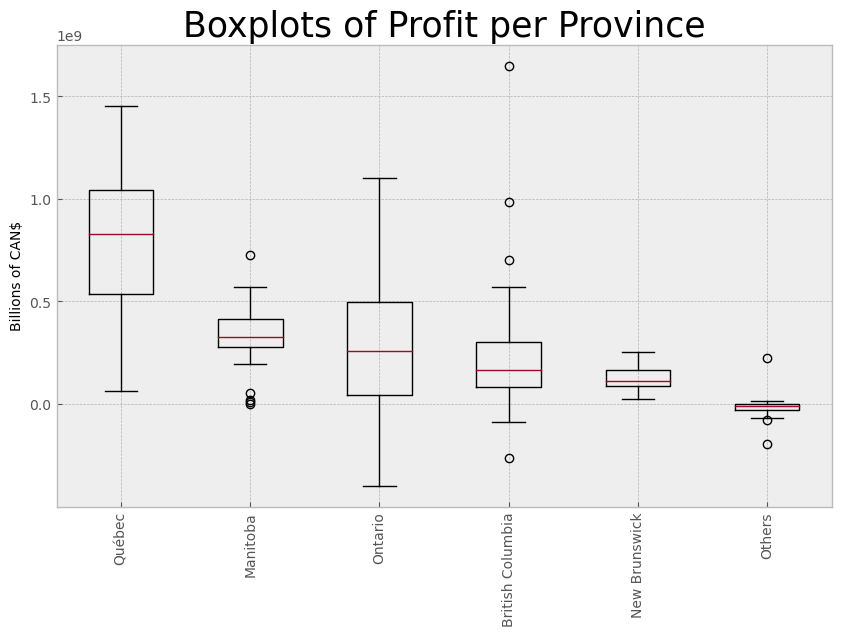

In [342]:
# Plotting a boxplot graph with the profit per province considering the energy trades with US

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.boxplot(profit_df[list_big_profits].fillna(0))
ax.set_xticklabels(['Québec', 'Manitoba', 'Ontario', 'British Columbia', 'New Brunswick', 'Others'], rotation=90)
ax.set_title('Boxplots of Profit per Province', fontsize=25)
ax.set_ylabel('Billions of CAN$')
plt.show()

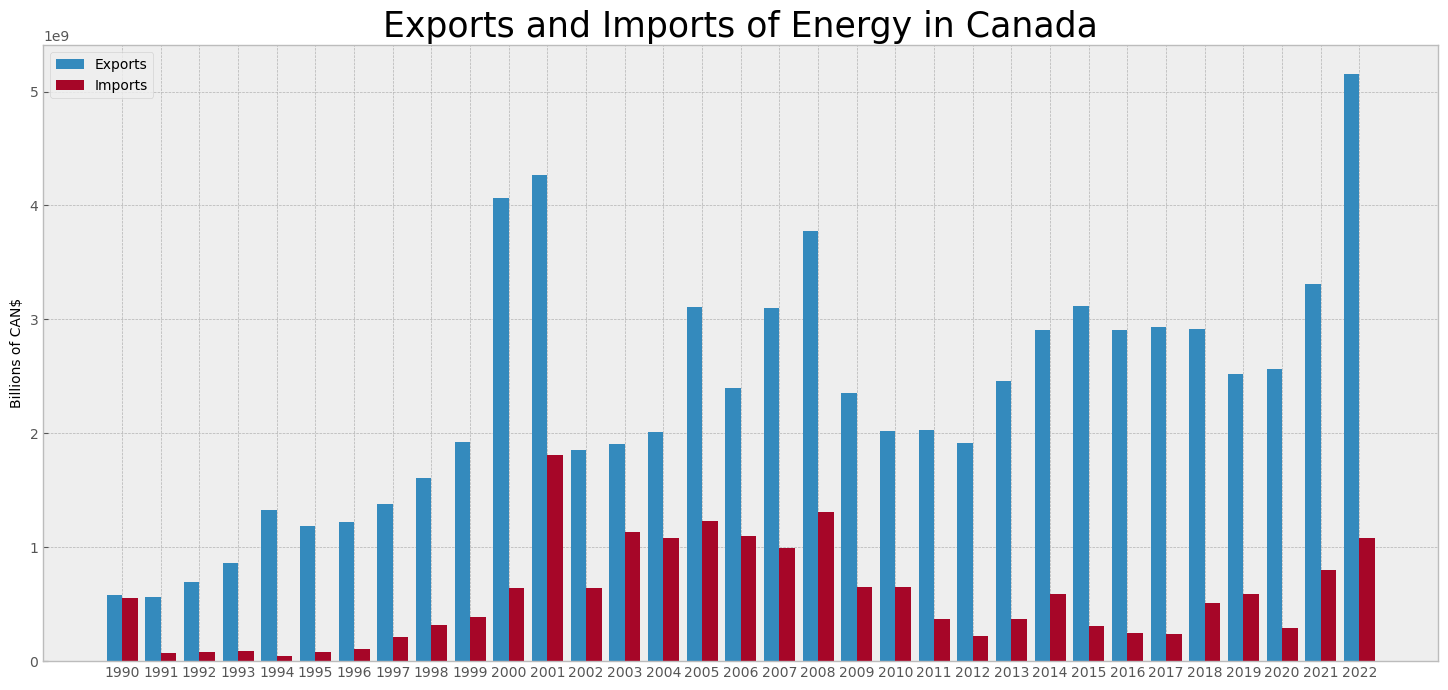

In [344]:
# Plotting a bar graph of total of CAN$ in energy traded with US

trade = ("Exports", "Imports")
export_totals = df_exp.groupby('Year')['Total Value (CAN$)'].sum()
import_totals = df_imp.groupby('Year')['Total Value (CAN$)'].sum()

x = np.arange(len(export_totals))
width = 0.4
fig, ax  = plt.subplots(figsize=(18,8))
# plot data in grouped manner of bar type
ax.bar(x-0.2, export_totals, width)
ax.bar(x+0.2, import_totals, width)
ax.set_xticks(x)
ax.set_xticklabels(range(1990, 2023))
ax.set_title('Exports and Imports of Energy in Canada', fontsize=25)
ax.set_ylabel('Billions of CAN$')
plt.legend(trade)
plt.show()

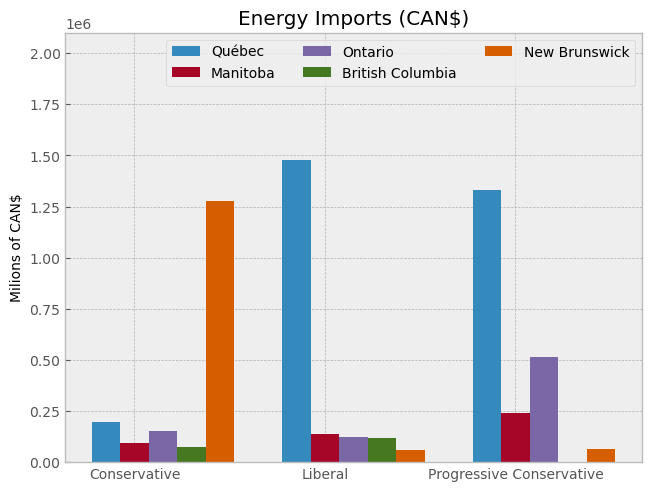

In [303]:
# Plotting a bar graph of energy imported from the US divided by the Prime Minister's Political Party

dic_p = {}
for province in list_big_profits:
    p1 = df_imp[(df_imp['Political Party'] == 'Conservative') & (df_imp['Destination'] == f'{province}')]['Total Value (CAN$)'].median()
    p2 = df_imp[(df_imp['Political Party'] == 'Liberal') & (df_imp['Destination'] == f'{province}')]['Total Value (CAN$)'].median()
    p3 = df_imp[(df_imp['Political Party'] == 'Progressive Conservative') & (df_imp['Destination'] == f'{province}')]['Total Value (CAN$)'].median()

    dic_p[f'{province}'] = [p1, p2, p3]
dic_p.pop('Others')
parties = ('Conservative', 'Liberal', 'Progressive Conservative')

x = np.arange(len(parties))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for prov, prov_median in dic_p.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, prov_median, width, label=prov)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Milions of CAN$')
ax.set_title('Energy Imports (CAN$)')
ax.set_xticks(x + width, parties)
ax.legend(ncols=3)
ax.set_ylim(0, 2100000)

plt.show()

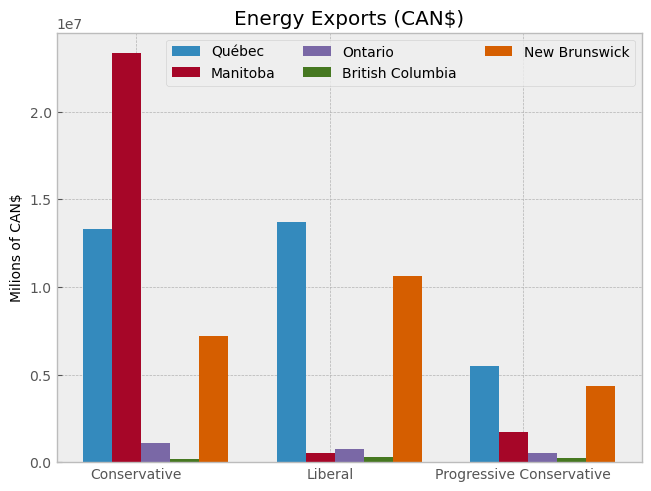

In [304]:
# Plotting a bar graph of energy exported to the US divided by the Prime Minister's Political Party

dic_p = {}
for province in list_big_profits:
    p1 = df_exp[(df_exp['Political Party'] == 'Conservative') & (df_exp['Source'] == f'{province}')]['Total Value (CAN$)'].median()
    p2 = df_exp[(df_exp['Political Party'] == 'Liberal') & (df_exp['Source'] == f'{province}')]['Total Value (CAN$)'].median()
    p3 = df_exp[(df_exp['Political Party'] == 'Progressive Conservative') & (df_exp['Source'] == f'{province}')]['Total Value (CAN$)'].median()

    dic_p[f'{province}'] = [p1, p2, p3]
dic_p.pop('Others')
parties = ('Conservative', 'Liberal', 'Progressive Conservative')

x = np.arange(len(parties))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for prov, prov_median in dic_p.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, prov_median, width, label=prov)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Milions of CAN$')
ax.set_title('Energy Exports (CAN$)')
ax.set_xticks(x + 0.2, parties)
ax.legend(ncols=3)

plt.show()

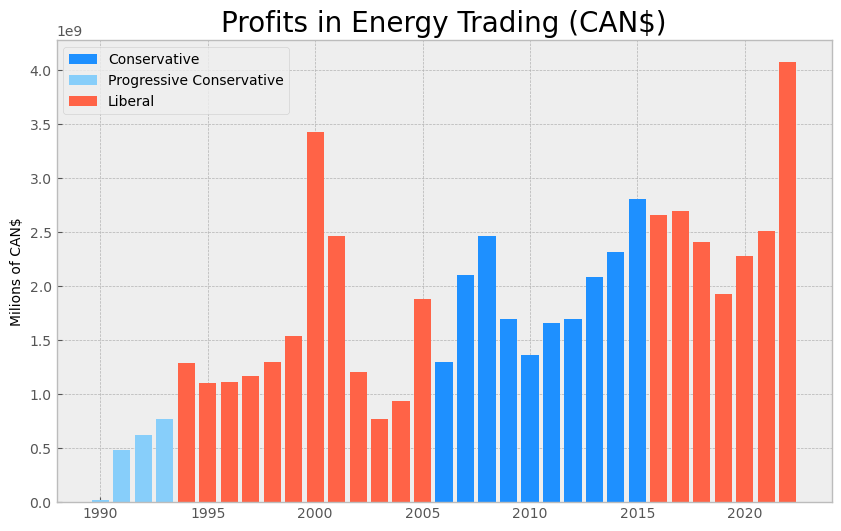

In [347]:
# Plotting a bar graph of Profits in energy trading with the US segmented by the Prime Minister's Political Party 

fig, ax = plt.subplots(figsize=(10, 6))
profit = df_exp.groupby(['Political Party', 'Year']).sum(numeric_only=True) - df_imp.groupby(['Political Party', 'Year']).sum(numeric_only=True)
ax.bar(profit.loc['Conservative'].index, profit.loc['Conservative']['Total Value (CAN$)'], color='dodgerblue')
ax.bar(profit.loc['Progressive Conservative'].index, profit.loc['Progressive Conservative']['Total Value (CAN$)'], color='lightskyblue')
ax.bar(profit.loc['Liberal'].index, profit.loc['Liberal']['Total Value (CAN$)'], color='tomato')

# Setting the profit for the transition years
ax.bar(1993, profit.loc['Progressive Conservative', 1993]['Total Value (CAN$)']+profit.loc['Liberal', 1993]['Total Value (CAN$)'], color='lightskyblue')
ax.bar(2006, profit.loc['Liberal', 2006]['Total Value (CAN$)']+profit.loc['Conservative', 2006]['Total Value (CAN$)'], color='dodgerblue')
ax.bar(2015, profit.loc['Conservative', 2015]['Total Value (CAN$)']+profit.loc['Liberal', 2015]['Total Value (CAN$)'], color='dodgerblue')

ax.set_ylabel('Milions of CAN$')
ax.set_title('Profits in Energy Trading (CAN$)', fontsize=20)
plt.legend(['Conservative', 'Progressive Conservative', 'Liberal'], loc='upper left')
plt.show()

In [349]:
# Creating the variables to support the next graph
df_pp = df_imp[['Destination', 'Year', 'Province Power Plants']].rename(columns={'Destination':'Province'})
periods_of_governments = ['Progressive Conservative', 'Liberal 1994', 'Conservative', 'Liberal 2015']
dic = {}
for province in list_provinces:
    p1 = df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 1994)]['Province Power Plants'].min() - df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 1990)]['Province Power Plants'].min()
    p2 = df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2006)]['Province Power Plants'].min() - df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 1994)]['Province Power Plants'].min()
    p3 = df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2015)]['Province Power Plants'].min() - df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2006)]['Province Power Plants'].min()
    p4 = df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2022)]['Province Power Plants'].min() - df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2015)]['Province Power Plants'].max()
    dic[f'{province}'] = [p1, p2, p3, p4]

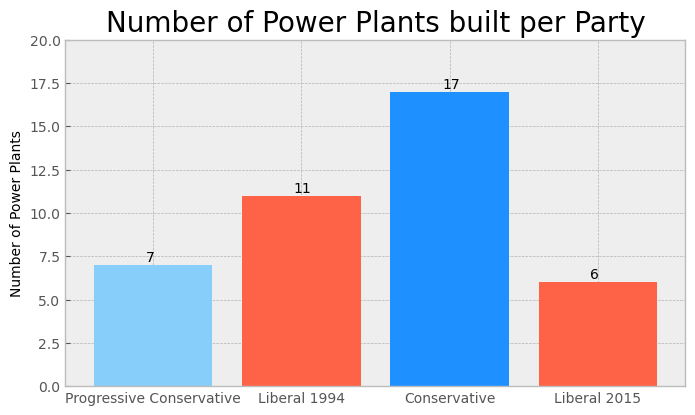

In [353]:
# Plotting a bar graph with the amount of power plants built per political party

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.bar(pd.DataFrame(dic, index=periods_of_governments).index, pd.DataFrame(dic, index=periods_of_governments).sum(axis=1),
      color=['lightskyblue', 'tomato', 'dodgerblue', 'tomato'])
for i, v in enumerate(pd.DataFrame(dic, index=periods_of_governments).sum(axis=1)):
    ax.text(i - 0.05, v + 0.2, str(int(v)), color='black')
ax.set_title('Number of Power Plants built per Party', fontsize=20)
ax.set_ylabel('Number of Power Plants')
ax.set_ylim([0, 20])
plt.show()

<Axes: >

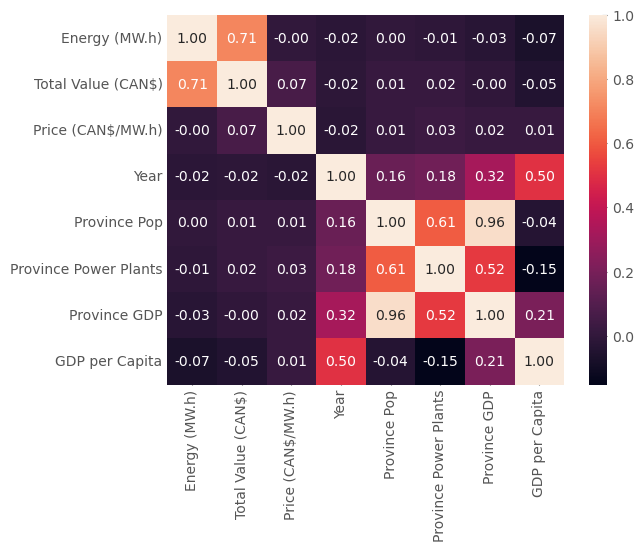

In [308]:
# Plotting an overall correlation in the imports dataframe
# Not very conclusive because the amount of energy imported throughout the year varies while other variables keep the same
sns.heatmap(df_imp.corr(numeric_only=True), annot=True, fmt=".2f")

<Axes: >

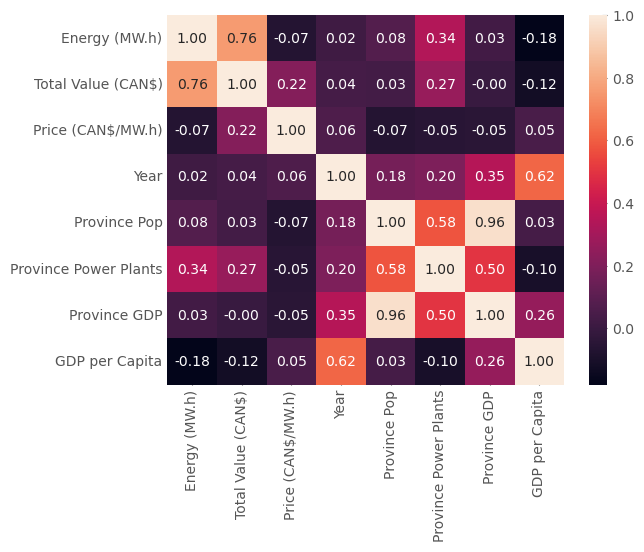

In [309]:
# Plotting an overall correlation in the exports dataframe
# Not very conclusive because the amount of energy exported throughout the year varies while other variables keep the same
sns.heatmap(df_exp.corr(numeric_only=True), annot=True, fmt=".2f")

In [310]:
# Creating two groupby dataframes with Importations and Exportations per Period
imp_groupby = df_imp.groupby(['Destination', 'Period']).sum(numeric_only=True)
exp_groupby = df_exp.groupby(['Source', 'Period']).sum(numeric_only=True)

# Creatinga a list with the name of the Provinces
list_provinces = list(df_imp['Destination'].unique())
# Creating an empty dataframe to insert the profits per province and year
profit_df = pd.DataFrame()
# Runing through the all the provinces
for province in list_provinces:
    # Calculating the profit per province
    cur_df = exp_groupby.loc[province] - imp_groupby.loc[province]
    # Adding the profit of the current Province to the Dataframe
    profit_df = profit_df.merge(cur_df[['Total Value (CAN$)']].rename(columns={'Total Value (CAN$)': f'{province}'}), how='outer', right_index=True, left_index=True)
# Grouping the least profitable Provinces into 'Others' category
list_big_profits = list(profit_df.sum().sort_values(ascending=False).head(5).index)
list_big_profits.append('Others')
# Creating the column 'Others' in the profit dataframe
profit_df['Others'] = profit_df.iloc[:, 5:].sum(axis=1)

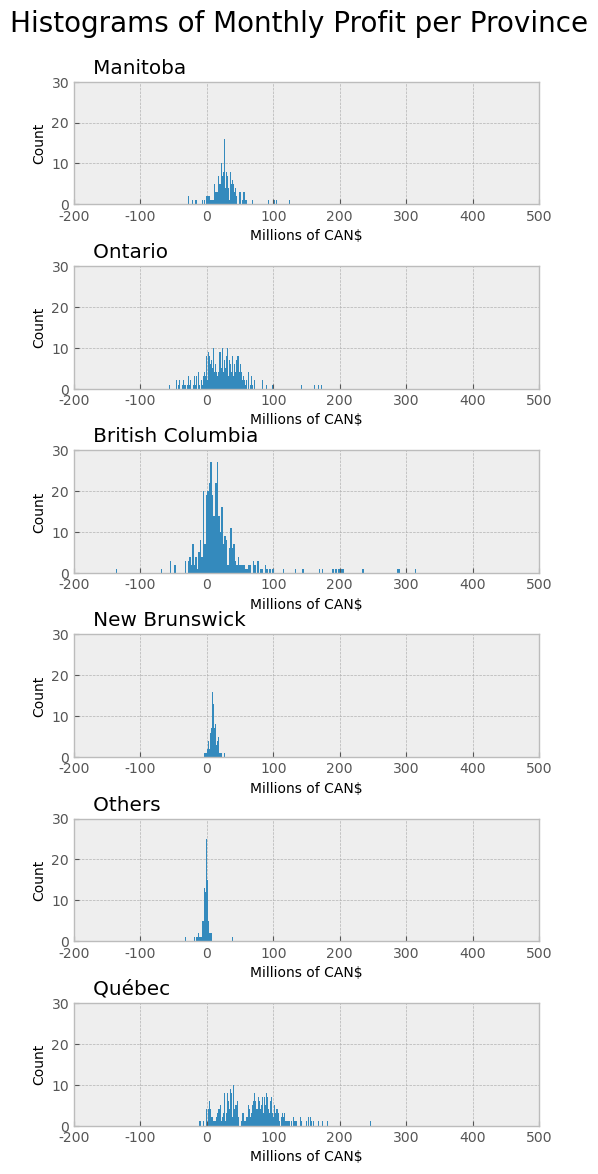

In [311]:
# Plotting histograms about the Monthly Profit of each province in energy tradings with US

fig, ax = plt.subplots(6,1, figsize=(6,12))
fig.subplots_adjust(hspace=0.5, top=0.92, bottom=0.05)
for y, province in enumerate(list_big_profits):
    y = y-1
    ax[y].hist(profit_df[f'{province}'], bins=200)
    ax[y].set_title(f'   {province}', loc='left')
    ax[y].set_xticks(range(-200000000,600000000,100000000))
    ax[y].set_xticklabels(['-200', '-100', '0', '100', '200', '300', '400', '500'])
    ax[y].set_ylim([0, 30])
    ax[y].set_ylabel('Count')
    ax[y].set_xlabel('Millions of CAN$')
fig.suptitle('Histograms of Monthly Profit per Province', fontsize=20)
plt.show(block=False)

In [312]:
# Creating groupby dataframes again to support the creation of the next graph
exp_groupby_year_source = df_exp.groupby(['Year', 'Source']).sum(numeric_only=True)
imp_groupby_year_source = df_imp.groupby(['Year', 'Destination']).sum(numeric_only=True)

In [313]:
# Creating the dataframes to support the next plot
dic = {}
for year in list(range(1990,2023)):
    dic[f'{year}'] = exp_groupby_year_source.loc[year].corr()['Energy (MW.h)']
mean_corr_exp = pd.DataFrame(dic).drop('Energy (MW.h)').mean(axis=1)
median_corr_exp = pd.DataFrame(dic).drop('Energy (MW.h)').median(axis=1)

dic = {}
for year in list(range(1990,2023)):
    dic[f'{year}'] = imp_groupby_year_source.loc[year].corr()['Energy (MW.h)']
mean_corr_imp = pd.DataFrame(dic).drop('Energy (MW.h)').mean(axis=1)
median_corr_imp = pd.DataFrame(dic).drop('Energy (MW.h)').median(axis=1)

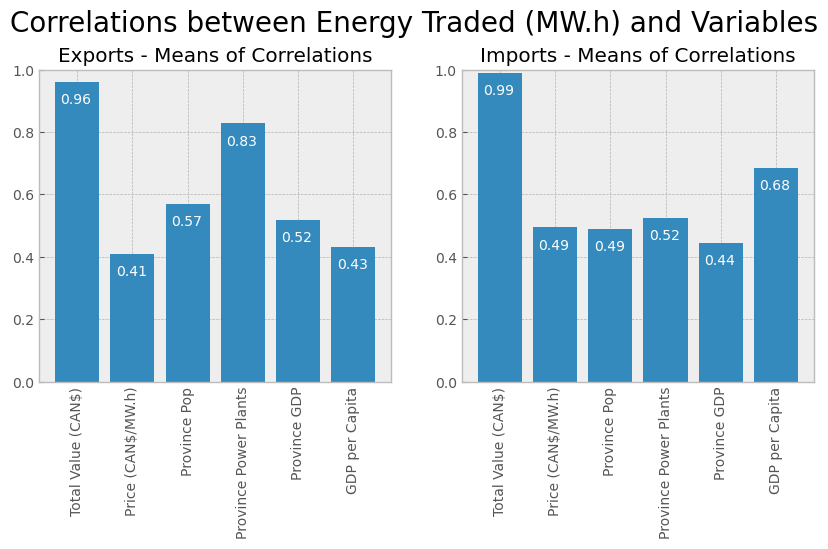

In [314]:
# Plotting a bar graph of the correlation between the Amount of Energy Traded and other variables
# It was used an average of the correlations of all the years

fig, ax = plt.subplots(1,2, figsize=(10,4))
fig.subplots_adjust(hspace=0.6, top=0.83, bottom=0.05)

ax[0].bar(list(median_corr_exp.index), median_corr_exp)
ax[0].set_xticks(range(len(median_corr_exp)))
ax[0].set_xticklabels(median_corr_exp.index, rotation=90)
ax[0].set_title('Exports - Means of Correlations')
ax[0].set_ylim([0,1])
for i, v in enumerate(median_corr_exp):
    ax[0].text(i - 0.3, v - 0.07, str(round(float(v), 2)), color='white')

ax[1].bar(list(median_corr_imp.index), median_corr_imp)
ax[1].set_xticks(range(len(median_corr_imp)))
ax[1].set_xticklabels(median_corr_imp.index, rotation=90)
ax[1].set_title('Imports - Means of Correlations')
ax[1].set_ylim([0,1])
for i, v in enumerate(median_corr_imp):
    ax[1].text(i - 0.3, v - 0.07, str(round(float(v), 2)), color='white')

fig.suptitle('Correlations between Energy Traded (MW.h) and Variables', fontsize=20)

plt.show()